<a href="https://colab.research.google.com/github/DanaeMartinez01/Metodos-Numericos-/blob/main/POHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de Hermite:
   5       4             2    
3⋅x    25⋅x       3   5⋅x     
──── - ───── + 7⋅x  - ──── + 1
 2       4             4      


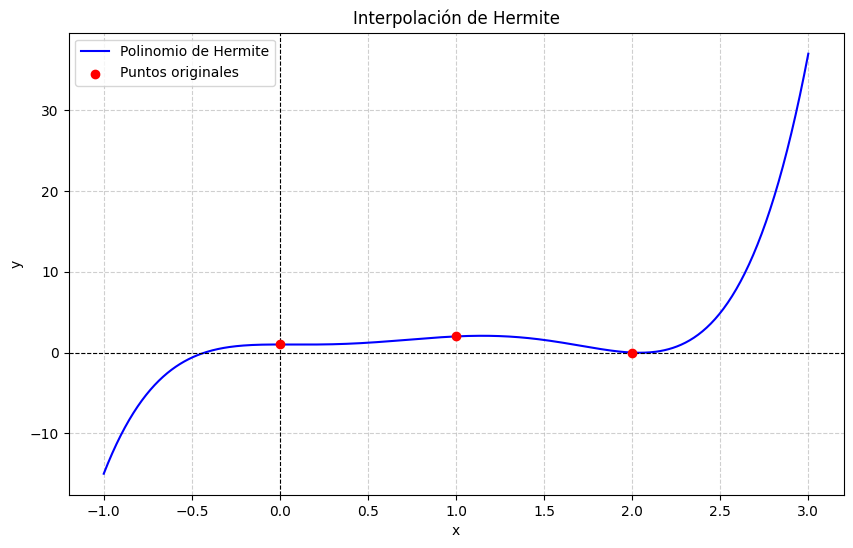

In [1]:
# Importamos las bibliotecas necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el polinomio osculante de Hermite
def hermite_interpolation(data):
    """
    Calcula el polinomio osculante de Hermite a partir de una tabla de datos.

    Args:
    - data: Lista de tuplas (x_i, y_i, y'_i), donde:
        * x_i: Punto en el eje x
        * y_i: Valor de la función en x_i
        * y'_i: Valor de la derivada de la función en x_i

    Returns:
    - P: Polinomio osculante de Hermite (expresión simbólica de Sympy)
    """
    # Variables simbólicas
    x = sp.Symbol('x')

    # Inicializamos el polinomio
    n = len(data)
    P = 0

    for i in range(n):
        # Datos de entrada
        xi, yi, dyi = data[i]

        # Construimos el polinomio base h_i(x)
        h_i = 1
        for j in range(n):
            if i != j:
                xj = data[j][0]
                h_i *= (x - xj) / (xi - xj)

        h_i_derivative = sp.diff(h_i, x)  # Derivada de h_i(x)

        # Términos del polinomio de Hermite
        term1 = (1 - 2 * (x - xi) * h_i_derivative.subs(x, xi)) * (h_i**2) * yi
        term2 = (x - xi) * (h_i**2) * dyi

        # Sumar los términos al polinomio total
        P += term1 + term2

    # Simplificamos el polinomio
    P = sp.simplify(P)
    return P

# Función para graficar el polinomio y los datos originales
def plot_hermite(data, P, x_range):
    """
    Grafica el polinomio osculante de Hermite junto con los puntos originales.

    Args:
    - data: Lista de tuplas (x_i, y_i, y'_i)
    - P: Polinomio de Hermite (objeto de Sympy)
    - x_range: Rango de valores de x para la gráfica (tupla (xmin, xmax))
    """
    # Convertimos el polinomio de Sympy a función de Python
    P_func = sp.lambdify(sp.Symbol('x'), P, 'numpy')

    # Generamos valores para graficar
    x_vals = np.linspace(x_range[0], x_range[1], 500)
    y_vals = P_func(x_vals)

    # Extraemos los puntos originales
    x_data = [d[0] for d in data]
    y_data = [d[1] for d in data]

    # Graficamos
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Polinomio de Hermite', color='blue')
    plt.scatter(x_data, y_data, color='red', label='Puntos originales', zorder=5)
    plt.title('Interpolación de Hermite')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Ejemplo de uso
# Datos: (x_i, y_i, y'_i)
data = [
    (0, 1, 0),  # x=0, f(x)=1, f'(x)=0
    (1, 2, 1),  # x=1, f(x)=2, f'(x)=1
    (2, 0, -1)  # x=2, f(x)=0, f'(x)=-1
]

# Calculamos el polinomio de Hermite
P = hermite_interpolation(data)

# Mostramos el polinomio
print("Polinomio de Hermite:")
sp.pprint(P)

# Graficamos el polinomio junto con los datos
plot_hermite(data, P, x_range=(-1, 3))

Explicación del código:

1.	Entrada de datos:
	•	La lista data contiene tuplas con los valores x_i, y_i = f(x_i), y y{\prime}_i = f{\prime}(x_i).
2.	Polinomio osculante de Hermite:
	•	La función hermite_interpolation calcula el polinomio siguiendo la fórmula de Hermite, sumando los términos construidos con las bases h_i(x) y sus derivadas.
3.	Gráfica:
	•	Usamos matplotlib para graficar el polinomio y resaltamos los puntos originales en color rojo.
4.	Validación:
	•	Puedes probar con diferentes conjuntos de datos para verificar su funcionamiento.